Dimension of input vectors (N): 2
Number of examples (P): 100


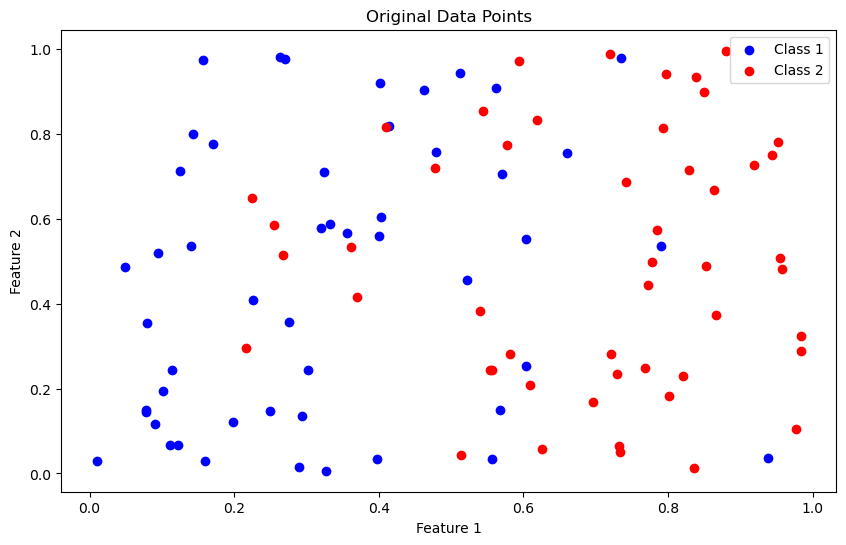

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in the file containing the data
data = pd.read_csv('lvqdata.csv', header=None)

# Determine dimensions of the input vectors and number of examples
N = data.shape[1]  # Dimension of input vectors
P = len(data)  # Number of examples
print('Dimension of input vectors (N):', N)
print('Number of examples (P):', P)

# Define corresponding class labels
class_labels = np.array([1] * 50 + [2] * 50)
C = 2 # Number of classes

# Visualization of data points
class1_data = data[class_labels == 1]
class2_data = data[class_labels == 2]

plt.figure(figsize=(10, 6))
plt.scatter(class1_data[0], class1_data[1], color='blue', label='Class 1')
plt.scatter(class2_data[0], class2_data[1], color='red', label='Class 2')
plt.title('Original Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [72]:
# Define the LVQ1 function
def lvq1(training_data, prototypes, class_labels, eta, tmax, prototype_indices):
    errors = []  # Training errors

    for epoch in range(tmax):
        shuffled_indices = np.random.permutation(P)
        error_count = 0  # Misclassified training examples

        for idx in shuffled_indices:
            example = training_data[idx]
            label = class_labels[idx]

            # Calculate squared Euclidean distances
            distances = np.sum((prototypes - example) ** 2, axis=1)
            winner_idx = np.argmin(distances)

            # Update the winning prototype 
            if label == class_labels[prototype_indices[winner_idx]]: #if they are in the same class
                    prototypes[winner_idx] += eta * (example - prototypes[winner_idx])
                
            else:
                    prototypes[winner_idx] -= eta * (example - prototypes[winner_idx])
                    error_count += 1


        # Calculate error rate for this epoch
        error_rate = error_count / P
        errors.append(error_rate)

        # Check for early stopping (when error rate becomes approximately constant)
        if epoch > 10 and np.mean(errors[-10:]) <= 0.01:
            break

    return errors

prototype indices when K=1:  [29 83]
prototypes when K=1:  [[0.12498 0.7123 ]
 [0.76762 0.24862]]


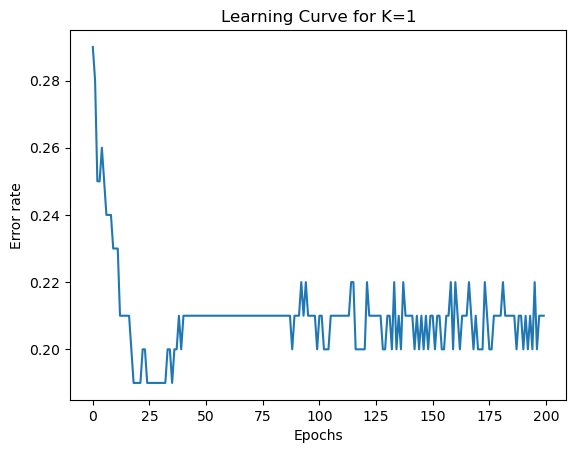

prototype indices when K=2:  [24  8 73 84]
prototypes when K=2:  [[0.079059  0.3546   ]
 [0.32732   0.0064253]
 [0.77273   0.44511  ]
 [0.79306   0.81356  ]]


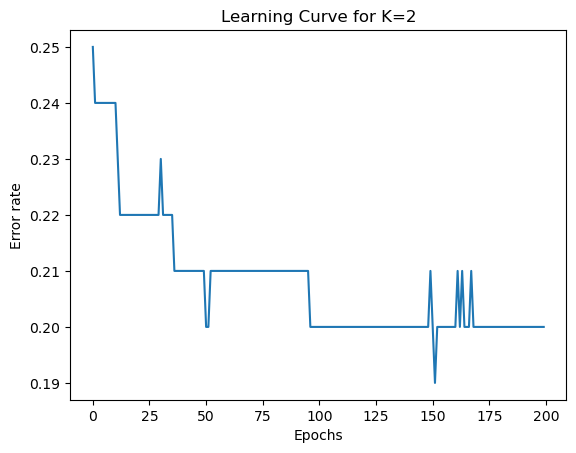

In [67]:
# Set the parameters
K_values = [1,2]
eta = 0.002
tmax = 200

for K in K_values:
    # Initialize prototypes randomly
    prototypes = np.zeros((K * C, N))  # Two prototypes per class
    prototype_indices=[]

    for i in range(C):
        indices = np.random.choice(np.where(class_labels == i + 1)[0], size=K, replace=False)
        prototype_indices.extend(indices)
        prototypes[i * K:(i + 1) * K] = data.values[indices]

    prototype_indices = np.array(prototype_indices)
    print(f"prototype indices when K={K}: ", prototype_indices)
    print(f"prototypes when K={K}: ", prototypes)
    
    # Train the LVQ1 model
    training_data = data.values
    errors = lvq1(training_data, prototypes, class_labels, eta, tmax, prototype_indices)

    # Plot the learning curve
    plt.plot(range(len(errors)), errors)
    plt.xlabel('Epochs')
    plt.ylabel('Error rate')
    plt.title(f'Learning Curve for K={K}')
    plt.show()

We weren't sure what does "a plot which shows the data with LVQ1 labels" means, so here are two versions:
<br> One with the points classified as class 1 and class 2
<br> One with the points classified as correctly classified or misclassified

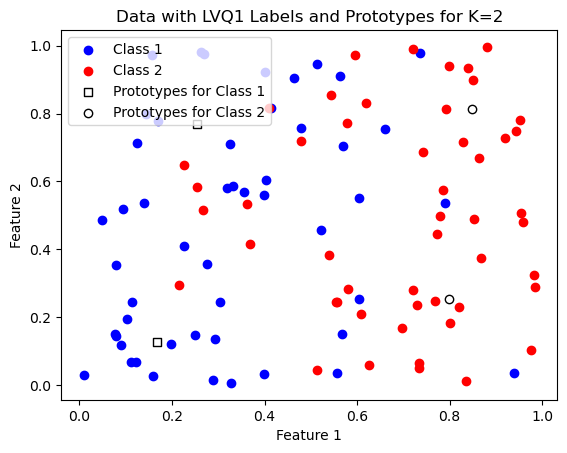

In [68]:
# After training, visualize the data with LVQ1 labels and prototypes
plt.scatter(data[class_labels == 1].iloc[:, 0], data[class_labels == 1].iloc[:, 1], color='blue', label='Class 1', marker='o')
plt.scatter(data[class_labels == 2].iloc[:, 0], data[class_labels == 2].iloc[:, 1], color='red', label='Class 2', marker='o')

# Plot the final prototypes as squares and circles
plt.scatter(prototypes[:K, 0], prototypes[:K, 1], color='white', edgecolors='black', marker='s', label='Prototypes for Class 1')
plt.scatter(prototypes[K:, 0], prototypes[K:, 1], color='white', edgecolors='black', marker='o', label='Prototypes for Class 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title(f'Data with LVQ1 Labels and Prototypes for K={K}')
plt.show()

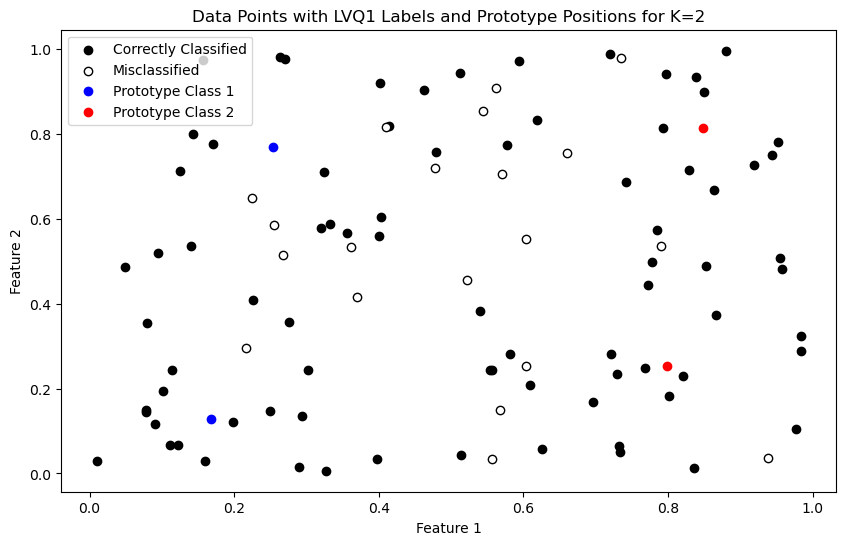

In [69]:
# Plot data points with LVQ1 labels and prototype positions for K=2
plt.figure(figsize=(10, 6))
correctly_classified = []
misclassified = []

# Plot correctly classified and misclassified points
for idx in range(P):
    example = training_data[idx]
    distances = np.sum((prototypes - example) ** 2, axis=1)
    winner_idx = np.argmin(distances)

    if class_labels[idx] == class_labels[prototype_indices[winner_idx]]:
        correctly_classified.append(idx)
    else:
        misclassified.append(idx)

correctly_classified = np.array(correctly_classified)
misclassified = np.array(misclassified)

plt.scatter(training_data[correctly_classified, 0], training_data[correctly_classified, 1], color='black', edgecolors='black', marker='o', label='Correctly Classified')
plt.scatter(training_data[misclassified, 0], training_data[misclassified, 1], color='white', edgecolors='black', marker='o', label='Misclassified')

# Plot prototype positions
plt.scatter(prototypes[:K, 0], prototypes[:K, 1], color='blue', label='Prototype Class 1', marker='o')
plt.scatter(prototypes[K:2*K, 0], prototypes[K:2*K, 1], color='red', label='Prototype Class 2', marker='o')

plt.title('Data Points with LVQ1 Labels and Prototype Positions for K=2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# BONUS : consider systems with three or four prototypes per class

prototype indices when K=3:  [34 30  4 58 95 77]
prototypes when K=3:  [[0.60369 0.25309]
 [0.56258 0.90919]
 [0.15934 0.0282 ]
 [0.58142 0.28179]
 [0.72157 0.28067]
 [0.57764 0.77321]]


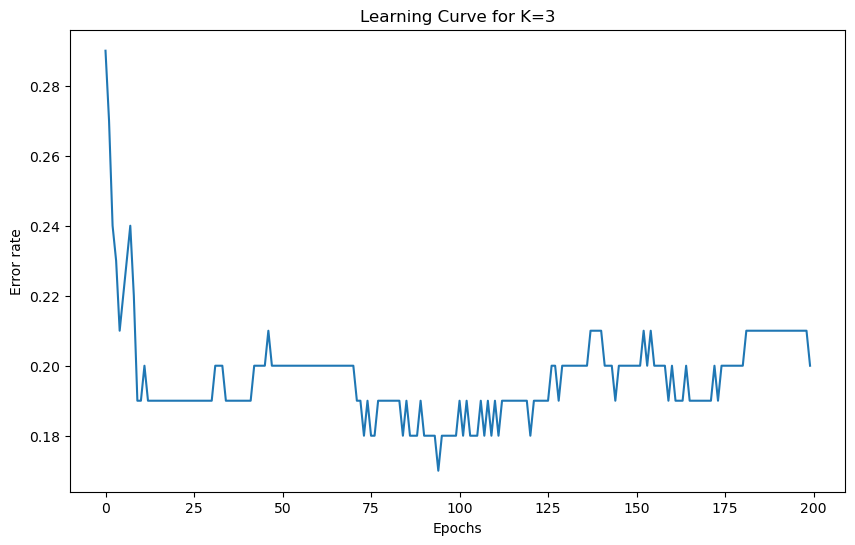

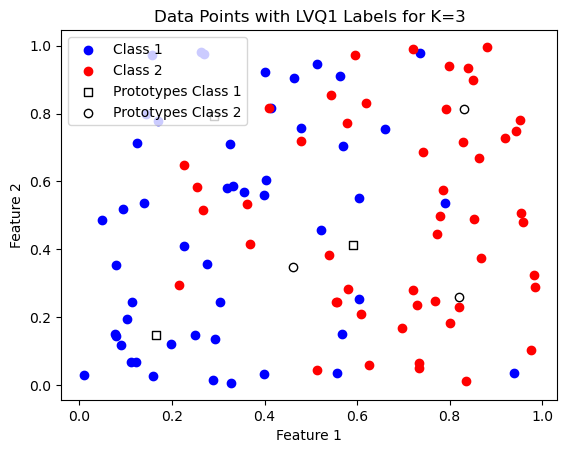

prototype indices when K=4:  [26  7  6 18 54 58 85 86]
prototypes when K=4:  [[0.32429  0.71074 ]
 [0.077499 0.14933 ]
 [0.11357  0.2439  ]
 [0.93845  0.035992]
 [0.9528   0.78204 ]
 [0.58142  0.28179 ]
 [0.73281  0.065702]
 [0.62609  0.058733]]


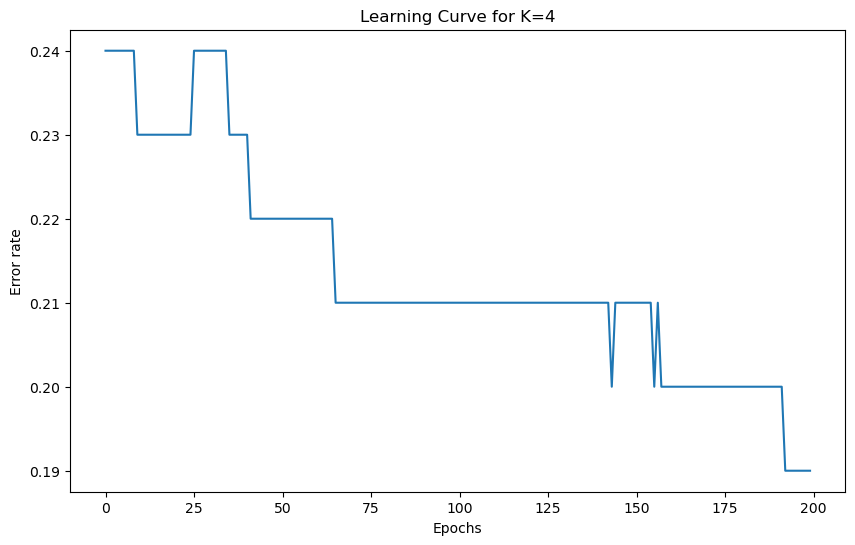

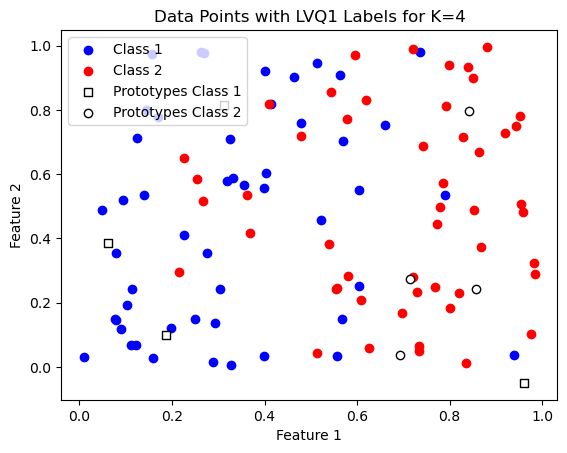

In [70]:
# Set the parameters
K_values = [3, 4]
eta = 0.002
tmax = 200

for K in K_values:
    # Initialize prototypes randomly
    prototypes = np.zeros((K * C, N))  
    prototype_indices = []

    for i in range(C):
        indices = np.random.choice(np.where(class_labels == i + 1)[0], size=K, replace=False)
        prototype_indices.extend(indices)
        prototypes[i * K:(i + 1) * K] = data.values[indices]

    prototype_indices = np.array(prototype_indices)
    print(f"prototype indices when K={K}: ", prototype_indices)
    print(f"prototypes when K={K}: ", prototypes)

    # Train the LVQ1 model
    training_data = data.values
    errors = lvq1(training_data, prototypes, class_labels, eta, tmax, prototype_indices)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(errors)), errors)
    plt.xlabel('Epochs')
    plt.ylabel('Error rate')
    plt.title(f'Learning Curve for K={K}')
    plt.show()

    # Plot the data points with LVQ1 labels and mark prototype positions
    plt.scatter(class1_data[0], class1_data[1], color='blue', label='Class 1')
    plt.scatter(class2_data[0], class2_data[1], color='red', label='Class 2')
    plt.scatter(prototypes[:K, 0], prototypes[:K, 1], color='white', edgecolors='black', marker='s', label='Prototypes Class 1')
    plt.scatter(prototypes[K:, 0], prototypes[K:, 1], color='white', edgecolors='black', marker='o', label='Prototypes Class 2')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title(f'Data Points with LVQ1 Labels for K={K}')
    plt.show()

# BONUS : Iris data

prototype indices when K=1:  [ 24  81 136]
prototypes when K=1:  [[4.8 3.4 1.9 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 3.4 5.6 2.4]]


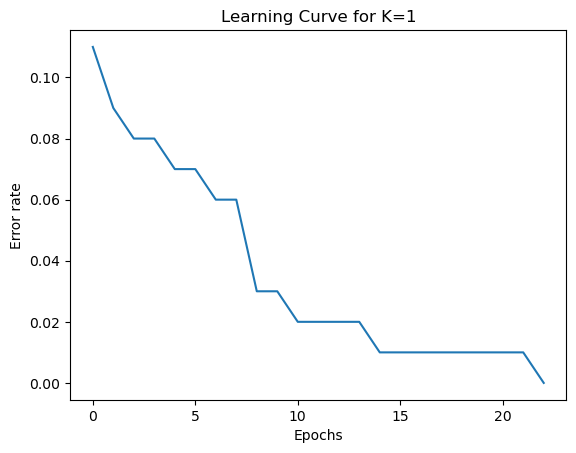

prototype indices when K=2:  [ 32  41  77  83 106 114]
prototypes when K=2:  [[5.2 4.1 1.5 0.1]
 [4.5 2.3 1.3 0.3]
 [6.7 3.  5.  1.7]
 [6.  2.7 5.1 1.6]
 [4.9 2.5 4.5 1.7]
 [5.8 2.8 5.1 2.4]]


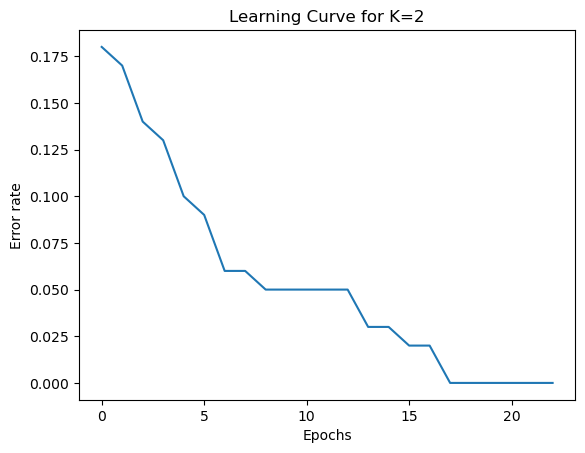

In [79]:
data_iris = pd.read_csv("iris.data", delimiter=' ', header=None)
data_iris = data_iris[0].str.split(',', expand=True)

# Define a mapping of class names to numerical values
class_mapping = {
    'Iris-setosa': 1,
    'Iris-versicolor': 2,
    'Iris-virginica': 3
}

# Replace class names with numerical values
data_iris[4] = data_iris[4].replace(class_mapping)

class_labels = data_iris[4].values

# Create a new dataframe with only the first 4 columns 
new_data_iris = data_iris.iloc[:, :4].values.astype(float)  

# Set the parameters
K_values = [1,2] # K is the number of prototypes per class
eta = 0.002
tmax = 150
C = 3
N = 4

for K in K_values:
    # Initialize prototypes randomly
    prototypes = np.zeros((K * C,N)) 
    prototype_indices=[]

    for i in range(C):
        indices = np.random.choice(np.where(class_labels == i + 1)[0], size=K, replace=False)
        prototype_indices.extend(indices)
        prototypes[i * K:(i + 1) * K] = new_data_iris[indices]

    prototype_indices = np.array(prototype_indices)
    print(f"prototype indices when K={K}: ", prototype_indices)
    print(f"prototypes when K={K}: ", prototypes)
    
    # Train the LVQ1 model
    training_data = new_data_iris
    errors = lvq1(training_data, prototypes, class_labels, eta, tmax, prototype_indices)

    # Plot the learning curve
    plt.plot(range(len(errors)), errors)
    plt.xlabel('Epochs')
    plt.ylabel('Error rate')
    plt.title(f'Learning Curve for K={K}')
    plt.show()